# **IMPORT LIBRARY**

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# **PEMROSESAN DATA**

## **Import Data Train**




In [16]:
df = pd.read_excel('kendaraan_train.xlsx')
df

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## **Melihat Ringkasan Data**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
id                   285831 non-null int64
Jenis_Kelamin        271391 non-null object
Umur                 271617 non-null float64
SIM                  271427 non-null float64
Kode_Daerah          271525 non-null float64
Sudah_Asuransi       271602 non-null float64
Umur_Kendaraan       271556 non-null object
Kendaraan_Rusak      271643 non-null object
Premi                271262 non-null float64
Kanal_Penjualan      271532 non-null float64
Lama_Berlangganan    271839 non-null float64
Tertarik             285831 non-null int64
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


## **Menghapus Kolom ID dan Tertarik**

In [18]:
df = df.drop(['id','Tertarik'],1)
df

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0


## **Mengubah Cetgorical Menjadi Numerik**

1.   Kolom Jenis_Kelamin
> *   0: 'Wanita'
> *   1: 'Pria'
2.   Kolom Umur_Kendaraan
> *   .< 1 Tahun: 0
> *   .1-2 Tahun: 1
> *   .> 2 Tahun: 2
3.   Kolom Kendaraan_Rusak
> *   Tidak : 0
> *   Pernah: 1





In [19]:
df = df.replace({"Jenis_Kelamin": {'Wanita':0, 'Pria':1}}) 
df = df.replace({"Umur_Kendaraan": {'< 1 Tahun':0, '1-2 Tahun':1, '> 2 Tahun':2}}) 
df = df.replace({"Kendaraan_Rusak": {'Tidak':0, 'Pernah':1}})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
Jenis_Kelamin        271391 non-null float64
Umur                 271617 non-null float64
SIM                  271427 non-null float64
Kode_Daerah          271525 non-null float64
Sudah_Asuransi       271602 non-null float64
Umur_Kendaraan       271556 non-null float64
Kendaraan_Rusak      271643 non-null float64
Premi                271262 non-null float64
Kanal_Penjualan      271532 non-null float64
Lama_Berlangganan    271839 non-null float64
dtypes: float64(10)
memory usage: 21.8 MB


## **MISSING VALUES**

### **Cek Apakah Ada NaN Values pada Masing2 Kolom**

In [21]:
print("Apakah Terdapat Data yang Kosong? ",df.isnull().values.any())

Apakah Terdapat Data yang Kosong?  True


### **Cek Banyaknya NaN Values pada Masing2 Kolom**

In [22]:
df.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

### **Mengisi Missing Values (NaN)**

1.   Diisi dengan Modus:
> * Jenis_Kelamin
> * SIM
> * Sudah_Asuransi
> * Umur_Kendaraan
> * Kendaraan_Rusak
> * Kode_Daerah
2.   Diisi dengan Mean :
> * Umur
> * Premi
> * Kanal_Penjualan
> * Lama_Berlangganan



In [23]:
#Data Diskrit
df['Jenis_Kelamin'].replace(np.nan, df['Jenis_Kelamin'].mode()[0], inplace=True)
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].astype('float')

df['SIM'].replace(np.nan, df['SIM'].mode()[0], inplace=True)
df['SIM'] = df['SIM'].astype('float')

df['Sudah_Asuransi'].replace(np.nan, df['Sudah_Asuransi'].mode()[0], inplace=True)
df['Sudah_Asuransi'] = df['Sudah_Asuransi'].astype('float')

df['Umur_Kendaraan'].replace(np.nan, df['Umur_Kendaraan'].mode()[0], inplace=True)
df['Umur_Kendaraan'] = df['Umur_Kendaraan'].astype('float')

df['Kendaraan_Rusak'].replace(np.nan, df['Kendaraan_Rusak'].mode()[0], inplace=True)
df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].astype('float')

df['Kode_Daerah'].replace(np.nan, df['Kode_Daerah'].mode()[0], inplace=True)

df['Umur'].replace(np.nan, df['Umur'].mode()[0], inplace=True)

#Data Continu
df['Premi'].replace(np.nan, df['Premi'].mean(), inplace=True)
df['Kanal_Penjualan'].replace(np.nan, df['Kanal_Penjualan'].mean(), inplace=True)
df['Lama_Berlangganan'].replace(np.nan, df['Lama_Berlangganan'].mean(), inplace=True)

In [24]:
#CEK KEMBALI APAKAH MASIH ADA DATA KOSONG
print("Apakah Terdapat Data yang Kosong? ",df.isnull().values.any())

Apakah Terdapat Data yang Kosong?  False


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
Jenis_Kelamin        285831 non-null float64
Umur                 285831 non-null float64
SIM                  285831 non-null float64
Kode_Daerah          285831 non-null float64
Sudah_Asuransi       285831 non-null float64
Umur_Kendaraan       285831 non-null float64
Kendaraan_Rusak      285831 non-null float64
Premi                285831 non-null float64
Kanal_Penjualan      285831 non-null float64
Lama_Berlangganan    285831 non-null float64
dtypes: float64(10)
memory usage: 21.8 MB


In [26]:
df.describe()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
count,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000,285831.000000
mean,0.563683,38.106147,0.997957,26.485220,0.435939,0.629288,0.529372,30536.683472,112.021567,154.286302
std,0.495929,15.471865,0.045155,12.921482,0.495880,0.559618,0.499137,16712.080405,52.829291,81.620684
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,0.000000,24.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24929.000000,55.000000,85.000000
50%,1.000000,34.000000,1.000000,28.000000,0.000000,1.000000,1.000000,30949.000000,124.000000,154.286302
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,38845.000000,152.000000,223.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000


## **Check Outliers**

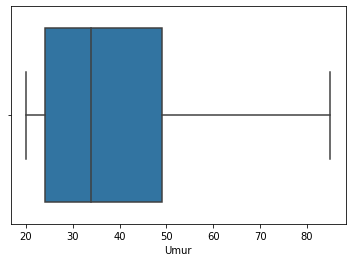

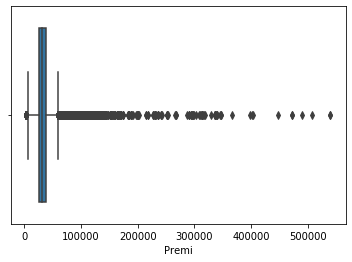

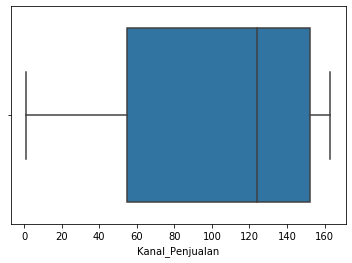

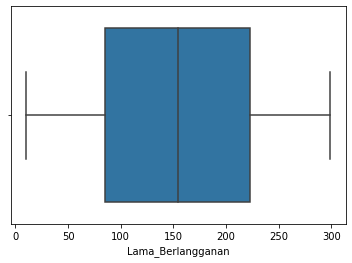

In [27]:
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Umur'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Premi'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Kanal_Penjualan'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Lama_Berlangganan'])
plt.show()

## **Mengatasi Outliers**

In [28]:
def interquartil(df,x):
  q1 = df[x].quantile(0.25)
  q3 = df[x].quantile(0.75)
  iqr = q3 - q1
  maximum = q3 + (1.5*iqr)
  minimum = q1 - (1.5*iqr)
  return maximum,minimum

In [29]:
def replace_outliers(df,x):
  maximum,minimum = interquartil(df,x)
  more_than = (df[x] > maximum)
  lower_than = (df[x] < minimum)
  df[x] = df[x].mask(more_than, maximum, axis=0)
  df[x] = df[x].mask(lower_than, minimum, axis=0)
  return df

In [30]:
df = replace_outliers(df,'Premi')

### **Setelah Ditangani Outlier** 

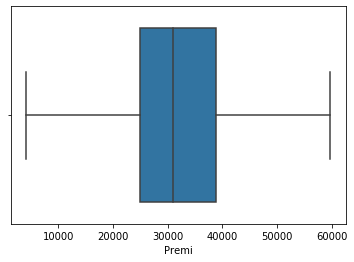

In [31]:
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Premi'])
plt.show()

## **Korelasi**

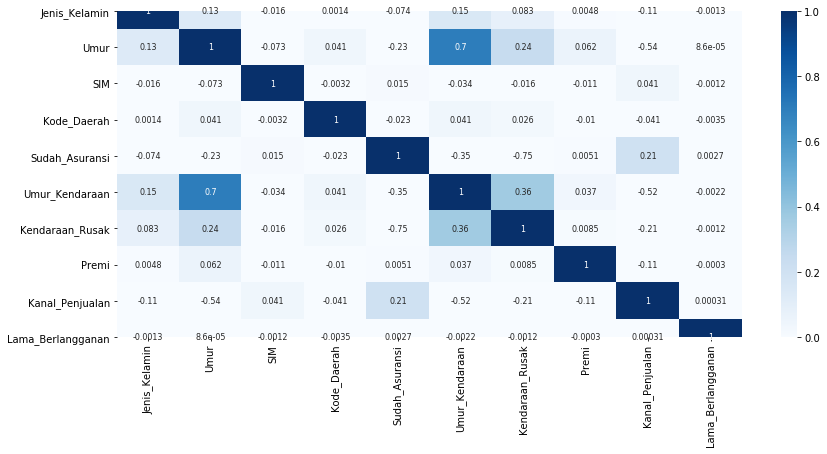

In [32]:
df_korelasi = df.corr()
plt.figure(figsize=(14, 6))
sns.heatmap(df_korelasi, annot=True, vmin = 0, vmax=1, annot_kws={"fontsize":8}, cmap='Blues')

## **NORMALISASI**

In [33]:
for x in df.drop(['Jenis_Kelamin', 'SIM', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak'],axis=1):
  df[x] = (df[x]-df[x].min())/(df[x].max()-df[x].min())

In [34]:
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.430691,0.932099,0.301038
1,1.0,0.430769,1.0,0.750000,0.0,2.0,1.0,0.390647,0.172840,0.512111
2,1.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.515198,0.981481,0.377163
3,0.0,0.584615,1.0,0.923077,0.0,1.0,0.0,0.000000,0.759259,0.183391
4,1.0,0.461538,1.0,0.673077,0.0,2.0,1.0,0.553356,0.537037,0.636678


### **Data Train**

In [35]:
df_train = df[['Premi','Kanal_Penjualan']]
df_train

,Premi,Kanal_Penjualan
0,0.430691,0.932099
1,0.390647,0.172840
2,0.515198,0.981481
3,0.000000,0.759259
4,0.553356,0.537037
...,...,...
285826,0.394025,0.932099
285827,0.729933,0.932099
285828,0.820926,0.932099
285829,0.475137,0.759259


# **Clustering**

## **Euclidean Distance**

In [36]:
def euclideanDist(d1,d2):
  return np.sqrt(np.sum((d1-d2)**2))

In [37]:
#euclideanDist(x.iloc[2],centro.iloc[1])

## **Initialized Centroid**



In [38]:
def random_centroid(df,k):
  random_idx = [np.random.randint(len(df)) for i in range(k)]
  centroids = []
  for i in random_idx:
    centroids.append(df.iloc[i].tolist())
  return np.asarray(centroids)

### **Mengitung jarak object dengan centroid**

In [39]:
def DOC(df,centroids,k):
  save_pca = []
  for i in range(len(df)):
    euc_d = []
    for j in range(k):
      euc_d.append(euclideanDist(df.iloc[i].tolist(),centroids[j]))
    save_pca.append(euc_d)
  return np.asarray(save_pca)

## **Menentukan Atribut di Cluster Tertentu**

In [40]:
def assign_cluster(df,centroids,k):
  cluster = []
  for i in range(len(df)):
    euc_d = []
    for j in range(k):
      euc_d.append(euclideanDist(df.iloc[i],centroids[j]))
    idx = np.argmin(euc_d)
    cluster.append(idx)
  return np.asarray(cluster)

## **Update Centroid**

In [41]:
def compute_centroid(df,cluster,k):
  centroid = []
  for i in range(k):
    temp_arr = []
    for j in range(len(df)):
      if (cluster[j]==i).all():
        temp_arr.append(df.iloc[j].tolist())
    if (len(temp_arr)!=0):
      centroid.append(np.mean(temp_arr,axis=0))
    else:
      centroid.append([0]*df.shape[1])
  return np.asarray(centroid)

## **Input PCA1 and PCA2 into Dataframe**


In [42]:
def inputDOC(df,centroids,cluster,k):
  df2 = copy.deepcopy(df)
  doc = DOC(df2,centroids,k)
  for j in range(k):
    df2['D(O,C{})'.format(j+1)] = [doc[i][j] for i in range(len(doc))]
    
  df2['Cluster'] = cluster
  return df2


## **Function Clustering**

In [43]:
def clusterisasi(df,k):
  cek = True
  centroid = random_centroid(df,k)
  df2 = copy.deepcopy(df)
  while (cek):
    oldcentroid = copy.deepcopy(centroid)
    cluster = assign_cluster(df2,centroid,k) 
    centroid = compute_centroid(df2,cluster,k)
    if (oldcentroid==centroid).all():
      cek = False
  return np.asarray(centroid),np.asarray(cluster+1)

In [44]:
def visualisasi(df,centroid,k):
  # Set Warna Setiap CLuster
  colors = ['r', 'g', '#0080ff', '#e69500', '#e89500']

  # Set Ukuran Dan Judul Plot
  plt.figure(figsize=(8, 8))
  plt.title('Data Clustering Result')

  # Melakukan Looping Setiap Titik Data Dan Centroid
  for i in range(k):
      plt.scatter(
          df['Premi'][df['Cluster'] == i+1], 
          df['Kanal_Penjualan'][df['Cluster'] == i+1],
          color=colors[i],
          label=f'Cluster {i+1}'
      )

      plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')

  # Acuan Penampilan Label Centroid
  plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')

  # Set Nama Label X Dan Y Pada Plot Dan Set Tempat Legend Ditampilkan
  plt.xlabel("Premi")
  plt.ylabel("Kanal_Penjualan")
  plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
  plt.show()



# **EVALUASI**

## **Sum of Squared Error (SSE)**
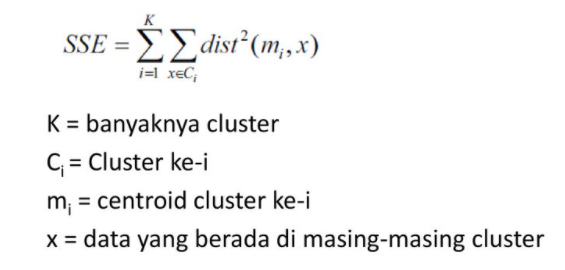


In [45]:
def sse(df,k):
  sum = 0
  for i in range(k):
    x = df[(df['Cluster'] == i+1)]['D(O,C{})'.format(i+1)]**2
    sum += x.sum()
  return sum

## **ELBOW METHOD** 


In [68]:
def elbowMethod(df,k_target):
  # Inisialisasi Array Untuk Distortion
  distortions = []

  # Inisialisasi Range K
  K = range(1, k_target)

  # Melakukan Perulangan Untuk Setiap Range
  for i in K:
      # Membangun Dan Fit Dataset
      model = KMeans(n_clusters=i).fit(df)
      model.fit(df)

      # Memasukkan Hasil Dari Jumlah cdist data, cluster_center Ke Array
      distortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

  # Plot data
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('Nilai K')
  plt.ylabel('Distortion')
  plt.title('Evaluasi Jumlah Cluster Dengan Elbow Method')
  plt.show()

# **EKSPERIMEN**

## **K=2**

### **Clustering**

In [47]:
k2 = 2
df_train2 = copy.deepcopy(df_train)
centroid2,cluster2 = clusterisasi(df_train2,k2)
df_train2 = inputDOC(df_train2,centroid2,cluster2,k2)

### **Visualisasi Data** 

Melihat 10 Data Teratas

In [48]:
df_train2.head(10)

,Premi,Kanal_Penjualan,"D(O,C1)","D(O,C2)",Cluster
0,0.430691,0.932099,0.068007,0.785468,1
1,0.390647,0.172840,0.699891,0.125039,2
2,0.515198,0.981481,0.125993,0.830446,1
3,0.000000,0.759259,0.470478,0.796175,1
4,0.553356,0.537037,0.346083,0.388025,1
5,0.335585,0.932099,0.136912,0.801129,1
6,0.509845,0.759259,0.122132,0.608235,1
7,0.409852,0.932099,0.078557,0.787945,1
8,0.480221,0.981481,0.114247,0.831122,1
9,1.000000,0.759259,0.553724,0.778687,1


Visualisasi Data Cluster dengan Scatter Plot

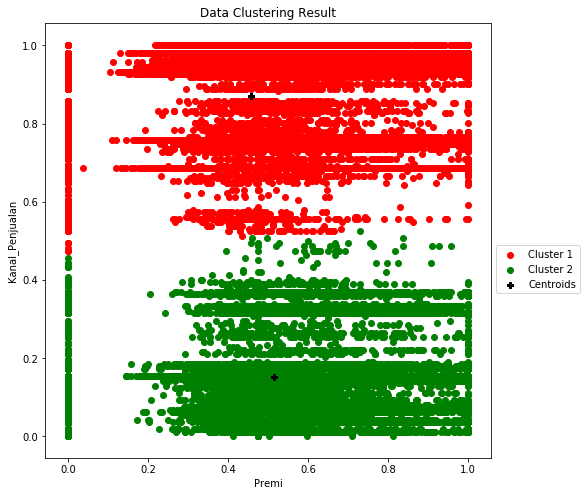

In [49]:
visualisasi(df_train2,centroid2,k2)

### **Evaluasi**

SSE

In [75]:
sse2 = sse(df_train2,k2)
print("sse dengan k=2: ",sse2)

sse dengan k=2:  21570.65976249103


## **K=3**

### **Clustering**

In [51]:
k3 = 3
df_train3 = copy.deepcopy(df_train)
centroid3,cluster3 = clusterisasi(df_train3,k3)
df_train3 = inputDOC(df_train3,centroid3,cluster3,k3)

### **Visualisasi Data** 

Melihat 10 Data Teratas

In [52]:
df_train3.head(10)

,Premi,Kanal_Penjualan,"D(O,C1)","D(O,C2)","D(O,C3)",Cluster
0,0.430691,0.932099,0.800559,0.883101,0.067921,3
1,0.390647,0.172840,0.226413,0.361846,0.700111,1
2,0.515198,0.981481,0.834286,0.966908,0.125706,3
3,0.000000,0.759259,0.864217,0.614779,0.470760,3
4,0.553356,0.537037,0.388818,0.653897,0.346206,3
5,0.335585,0.932099,0.827786,0.844197,0.137037,3
6,0.509845,0.759259,0.615192,0.779390,0.122207,3
7,0.409852,0.932099,0.805644,0.873839,0.078546,3
8,0.480221,0.981481,0.839240,0.949833,0.114005,3
9,1.000000,0.759259,0.717240,1.148145,0.553526,3


Visualisasi Data Cluster dengan Scatter Plot

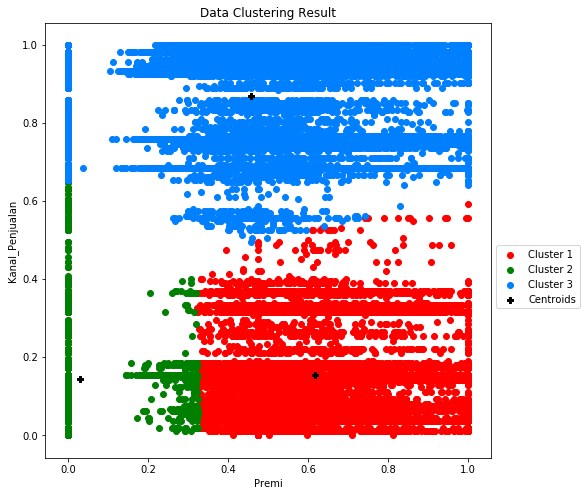

In [53]:
visualisasi(df_train3,centroid3,k3)

### **Evaluasi**

In [76]:
sse3 = sse(df_train3,k3)
print("sse dengan k=3: ",sse3)

sse dengan k=3:  17928.326484709054


## **K=4**

### **Clustering**

In [55]:
k4 = 4
df_train4 = copy.deepcopy(df_train)
centroid4,cluster4 = clusterisasi(df_train4,k4)
df_train4 = inputDOC(df_train4,centroid4,cluster4,k4)

### **Visualisasi Data** 

Melihat 10 Data Teratas

In [56]:
df_train4.head(10)

,Premi,Kanal_Penjualan,"D(O,C1)","D(O,C2)","D(O,C3)","D(O,C4)",Cluster
0,0.430691,0.932099,0.786434,0.429163,0.063610,0.349809,3
1,0.390647,0.172840,0.126524,0.802763,0.709211,0.765294,1
2,0.515198,0.981481,0.831270,0.520712,0.115069,0.290154,3
3,0.000000,0.759259,0.797684,0.117801,0.479456,0.771915,2
4,0.553356,0.537037,0.388710,0.645089,0.352550,0.370156,3
5,0.335585,0.932099,0.802238,0.335068,0.139701,0.442195,3
6,0.509845,0.759259,0.609071,0.518297,0.127300,0.269933,3
7,0.409852,0.932099,0.788944,0.408505,0.076735,0.369934,3
8,0.480221,0.981481,0.832003,0.486497,0.104478,0.321068,3
9,1.000000,0.759259,0.778484,1.001850,0.548580,0.245414,4


Visualisasi Data Cluster dengan Scatter Plot

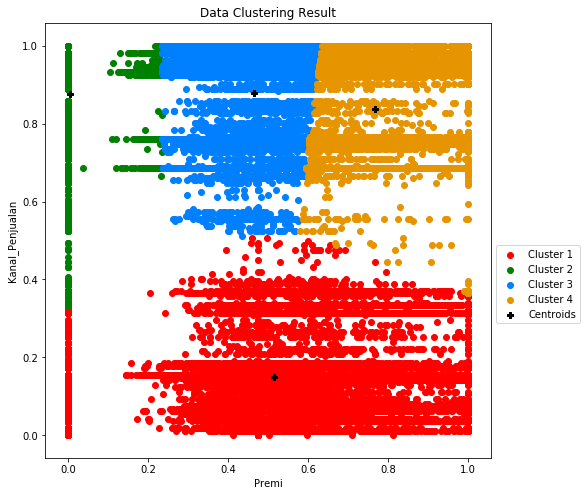

In [57]:
visualisasi(df_train4,centroid4,k4)

### **Evaluasi**

SSE

In [77]:
sse4 = sse(df_train4,k4)
print("sse dengan k=4: ",sse4)

sse dengan k=4:  9464.911483747468


Elbow Method

## **K=5**

### **Clustering**

In [59]:
k5 = 5
df_train5 = copy.deepcopy(df_train)
centroid5,cluster5 = clusterisasi(df_train5,k5)
df_train5 = inputDOC(df_train5,centroid5,cluster5,k5)

### **Visualisasi Data** 

Melihat 10 Data Teratas

In [60]:
df_train5.head(10)

,Premi,Kanal_Penjualan,"D(O,C1)","D(O,C2)","D(O,C3)","D(O,C4)","D(O,C5)",Cluster
0,0.430691,0.932099,0.200882,0.380505,0.037201,0.429578,0.786564,3
1,0.390647,0.172840,0.578531,0.791605,0.770455,0.802977,0.126521,5
2,0.515198,0.981481,0.240468,0.315900,0.063813,0.521121,0.831404,3
3,0.000000,0.759259,0.495484,0.807065,0.500712,0.117796,0.797769,4
4,0.553356,0.537037,0.212914,0.399072,0.411579,0.645453,0.388846,1
5,0.335585,0.932099,0.248324,0.473777,0.131773,0.335480,0.802362,3
6,0.509845,0.759259,0.022765,0.305712,0.185216,0.518710,0.609204,1
7,0.409852,0.932099,0.208508,0.400869,0.057773,0.408920,0.789072,3
8,0.480221,0.981481,0.240099,0.347969,0.043981,0.486905,0.832136,3
9,1.000000,0.759259,0.505122,0.217408,0.562503,1.002269,0.778605,2


Visualisasi Data Cluster dengan Scatter Plot

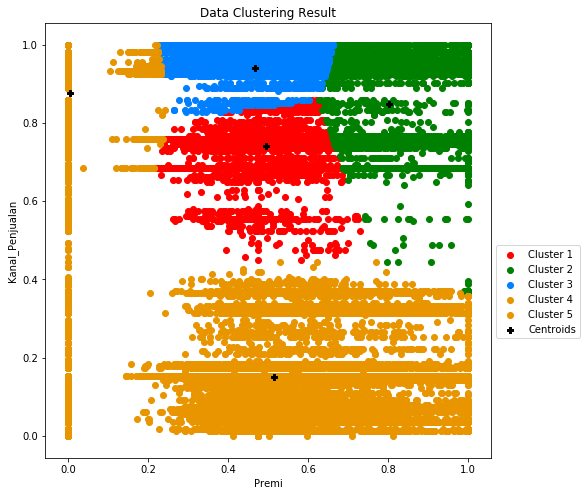

In [61]:
visualisasi(df_train5,centroid5,k5)

### **Evaluasi**

SSE

In [78]:
sse5 = sse(df_train5,k5)
print("sse dengan k=5: ",sse5)

sse dengan k=5:  8314.5804041597


# ELBOW METHOD

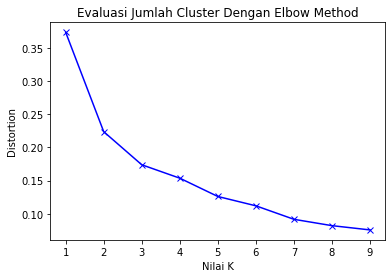

In [69]:
elbowMethod(df_train,10)